In [3]:
!pip install imbalanced-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
dataset_0=dataset.copy()
cols_0=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols_0:
    dataset_0[i].replace(0,dataset_0[i].mean(),inplace=True)
dataset_0.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
dataset_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


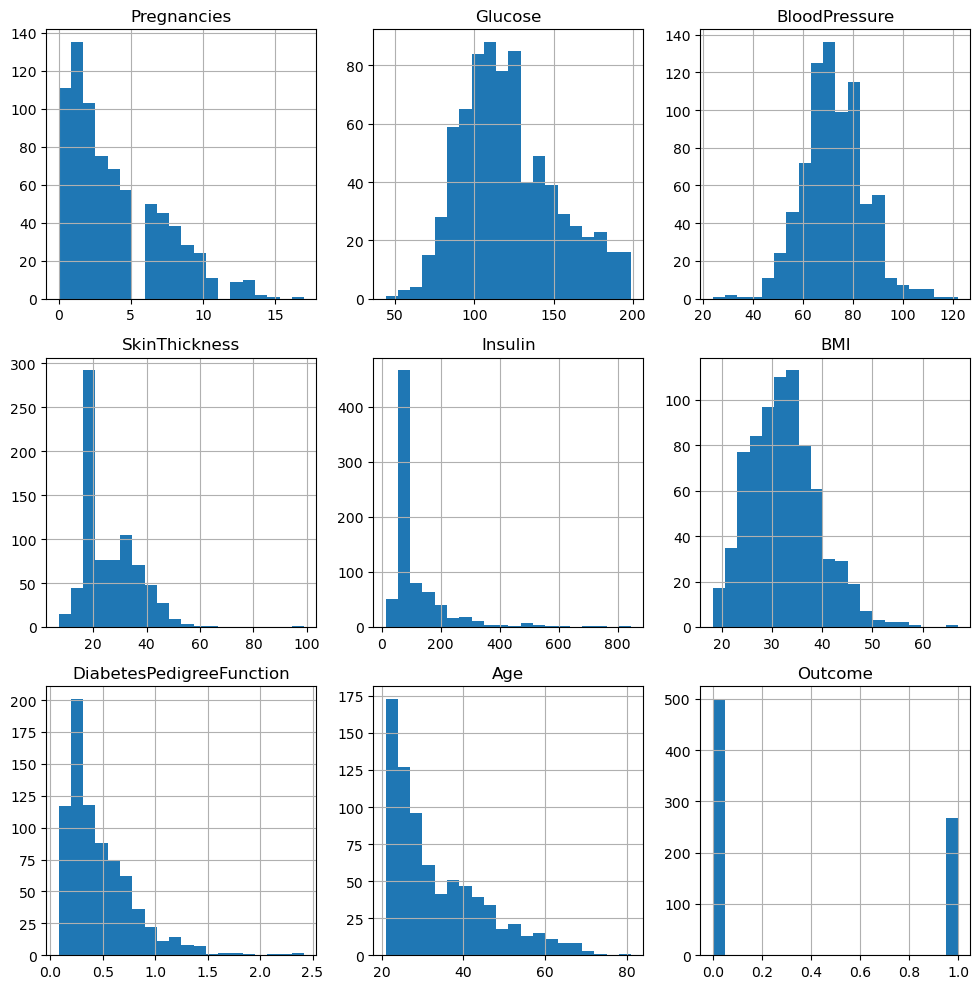

In [13]:
col=list(dataset_0.columns)
dataset_0[col].hist(stacked=True,bins=20,figsize=(10,10),layout=(3,3))
plt.tight_layout()


In [14]:
dataset_0.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


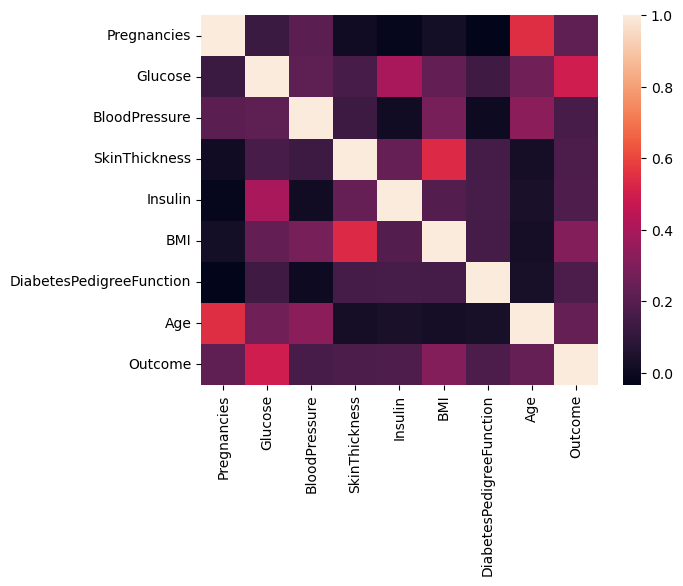

In [15]:
sns.heatmap(dataset_0.corr());

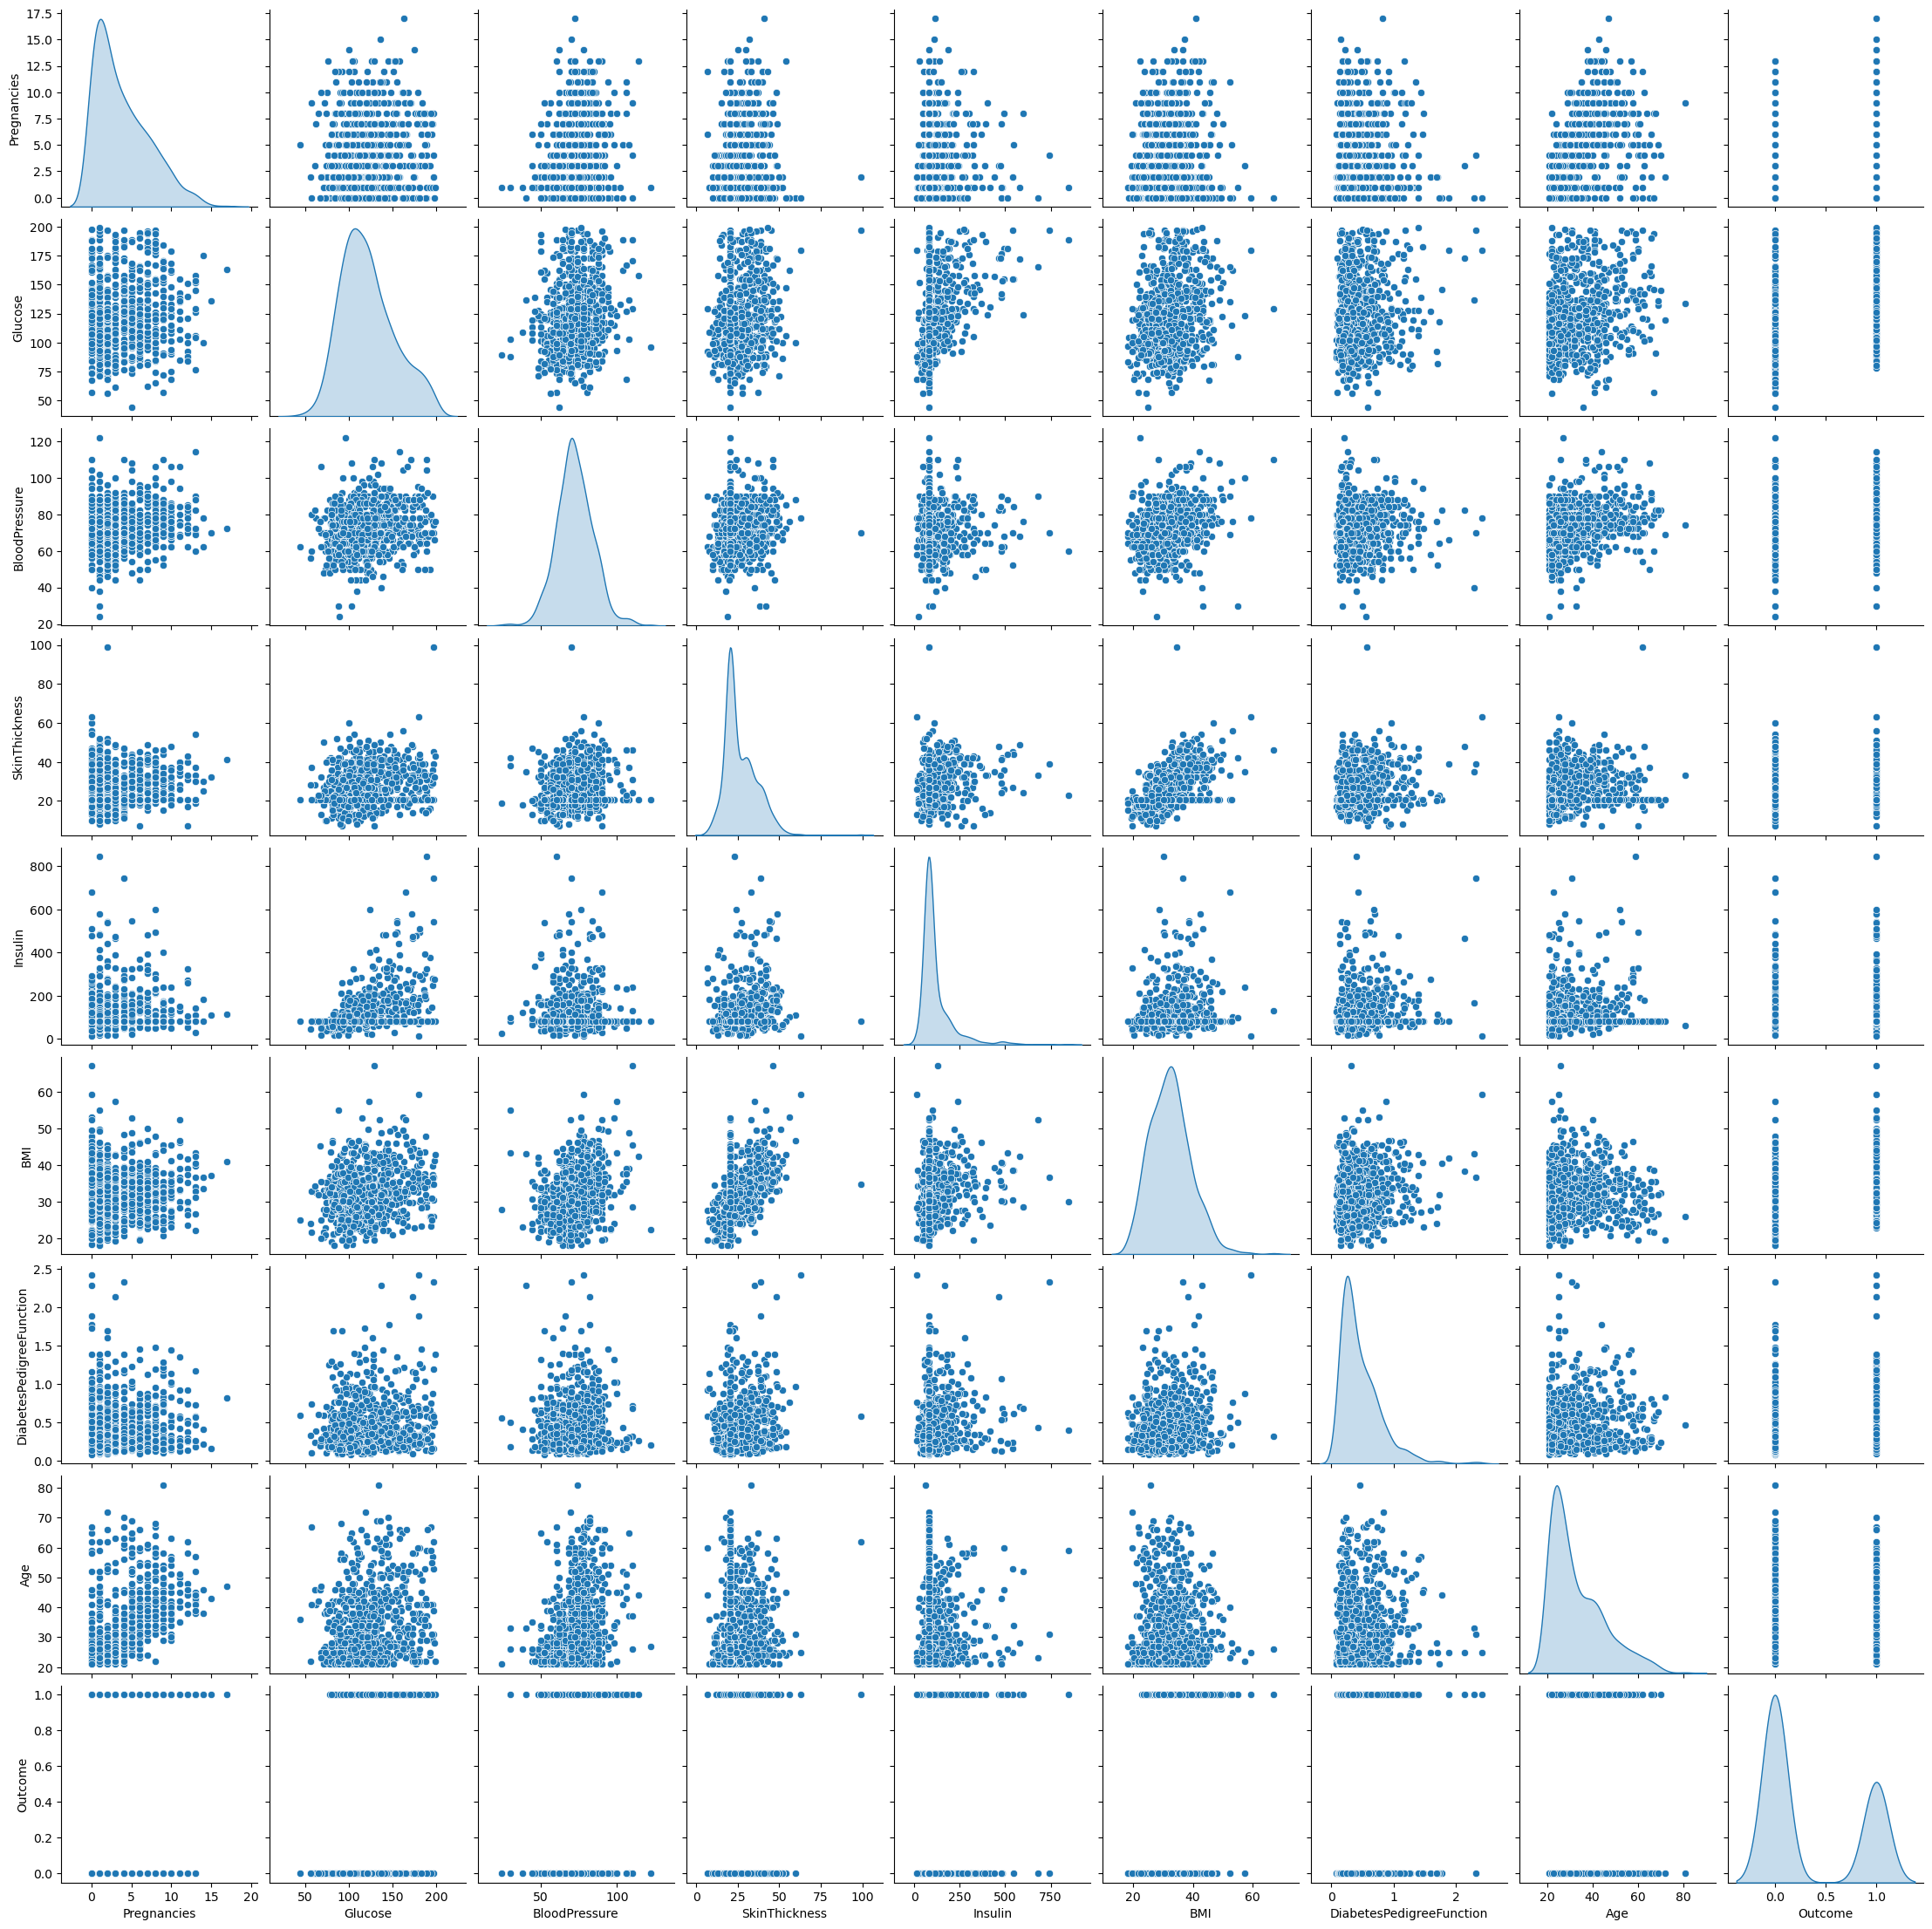

In [16]:
sns.pairplot(dataset_0,diag_kind='kde');

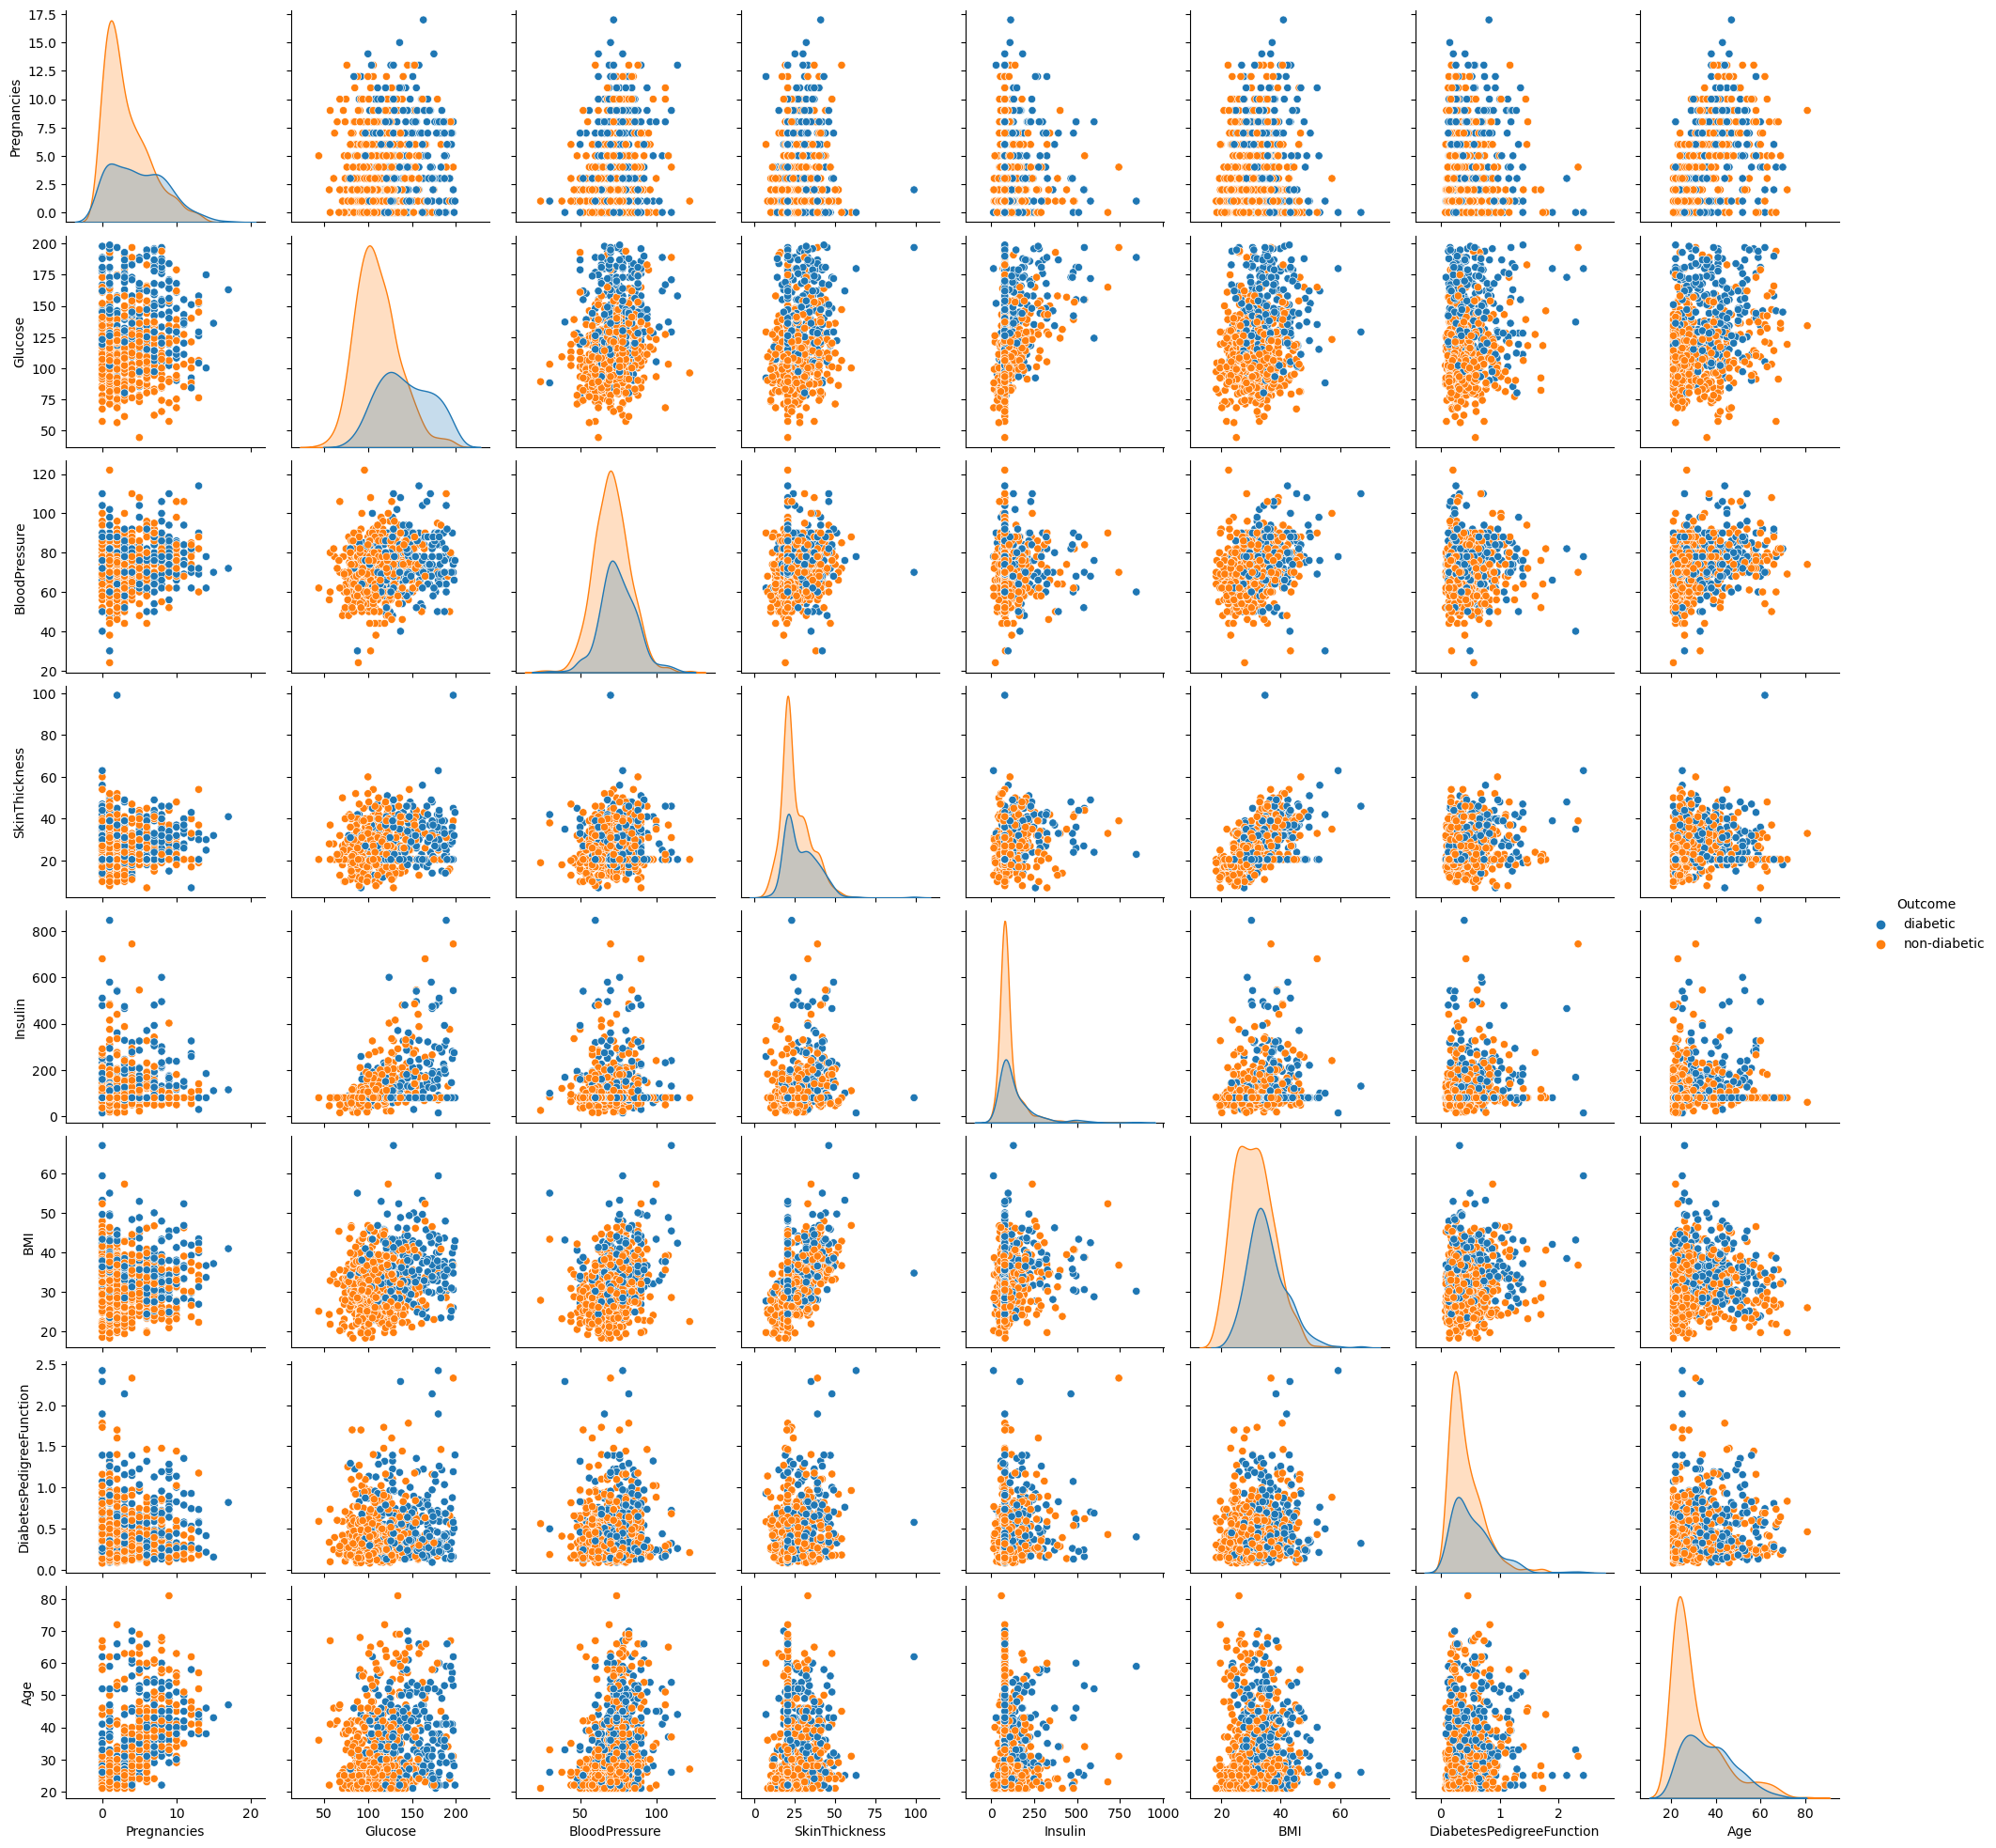

In [18]:
dataset_t=dataset_0.copy()
dataset_t['Outcome'].astype('category')
dataset_t['Outcome'].replace(0,"non-diabetic",inplace=True)
dataset_t['Outcome'].replace(1,"diabetic",inplace=True)
sns.pairplot(dataset_t,hue='Outcome',diag_kind='kde');

In [20]:
alpha= 0.05
def hypothesis_result(p_value):
    p_value = round(p_value, 4)
    if p_value < alpha:
        print ("As p-value is ",p_value,", which is lower than the significance level, we reject the null hypothesis.")
    else:
        print ("As p-value is",p_value,", which is higher than the significance level, we do not reject the null hypothesis.")


In [22]:
from scipy import stats
s2, p2 = stats.normaltest(dataset_0['Glucose'])
hypothesis_result(p2)

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.


In [23]:
s1, p1 = stats.pearsonr(dataset_0['Glucose'], dataset_0['Outcome'])
hypothesis_result(p1)
print("The correlation coefficient between Glucose and the Target Variable is: " + str(round(s1,4)))


As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.
The correlation coefficient between Glucose and the Target Variable is: 0.4929


In [24]:
#Splitting the data set into training and test set
X= dataset_0.drop(['Outcome'], axis=1)
Y = dataset_0['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [25]:
# Print the distribution of labels between the training and testing dataset
print("Ratio of Diabetes to Non-Diabetic Labels in training dataset is: {}".format(round (y_train.value_counts()[0]
/len(y_train),2)))
print("Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: {}".format(round (y_test.value_counts()[0]/len(y_test), 2)))

Ratio of Diabetes to Non-Diabetic Labels in training dataset is: 0.66
Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: 0.63


In [26]:
# Scaling the x training and testing dataset
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
# Confusion Matrix function
def conf_mtx(y_act,y_pred):
    cm=metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
    df_cm=pd.DataFrame(cm, index = [i for i in ["Diabetic", "Non-Diabetic"]],columns = [i for i in ["Predict Diabetic","Predict Non-Diabetic"]])
    plt.figure(figsize = (6,6))
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm, annot=True, fmt='g')
    Score_Accuracy = "%.2f%%" % (metrics.accuracy_score(y_act,y_pred)*100)
    Score_Recall ="%.2f%%" % (metrics.recall_score(y_act,y_pred)*100)
    Score_Precision ="%.2f%%" % (metrics.precision_score(y_act, y_pred)*100)
    print("Model Accuracy Score: "+ Score_Accuracy)
    print("Model Recall Score: "+ Score_Recall)
    print("Model Precision Score: "+ Score_Precision)
    return Score_Accuracy, Score_Recall, Score_Precision


In [28]:
# Prepare an empty summary dataframe to append the data of the various models for comparison
summary = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score', 'Test Recall Score', 'Test Precision Score', 'AUC'))

In [29]:
def ML_test(Mdl, Param_grid):
    if bool(Param_grid):
        Mdl = GridSearchCV(Mdl, Param_grid,cv=10)
        Mdl.fit(X_train_scaled,y_train)
        Mdl_params = Mdl.best_params_
        Mdl_train_sc = Mdl.cv_results_['mean_test_score'].mean()
        Mdl_test_sc = Mdl.score (X_test_scaled,y_test)
        probas=Mdl.predict_proba (X_test_scaled)
        print("Best fit parameter is: " + str(Mdl_params))
    else:
        Mdl = Mdl
        Mdl.fit(X_train_scaled,y_train)
        Mdl_train_sc = round(Mdl.score(X_train_scaled,y_train),4)
        Mdl_test_sc = round(Mdl.score(X_test_scaled,y_test),4)
        probas=Mdl.predict_proba(X_test_scaled)
    y_pred = Mdl.predict(X_test_scaled)
    print("Training score is: " + str(Mdl_train_sc))
    print("Test Mean score is: " + str(Mdl_test_sc))
    Score_Accuracy, Score_Recall, Score_Precision = conf_mtx(y_test,y_pred)
    Mdl_train_sc = "%.2f%%" % (Mdl_train_sc*100)
    fpr, tpr, thresholds=roc_curve(y_test, probas[:, 1])
    roc_auc = round(auc(fpr, tpr),4)
    print("Area under the ROC curve : "+ str(roc_auc))
    return Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc

Best fit parameter is: {'C': 0.5444444444444444, 'penalty': 'l2'}
Training score is: 0.7672868623340323
Test Mean score is: 0.7835497835497836
Model Accuracy Score: 78.35%
Model Recall Score: 58.82%
Model Precision Score: 76.92%
Area under the ROC curve : 0.8764


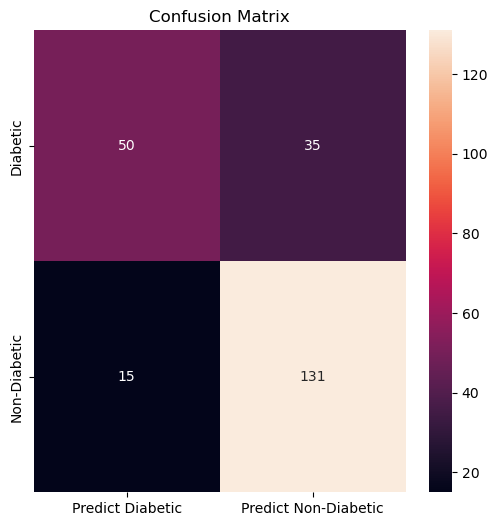

In [30]:
Mdl_LogReg=LogisticRegression (solver="liblinear")
model_name = "LogisticRegression"
Param_grid_LogReg = {'penalty': ['l1','l2'], 'C': np.linspace (0.1,1.1,10)}
Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl_LogReg, Param_grid_LogReg)
summary= summary._append({ 'Model':model_name, 'Training Accuracy': Mdl_train_sc, 'Test Accuracy Score': Score_Accuracy,'Test Recall Score' : Score_Recall, 'Test Precision Score': Score_Precision, 'AUC': roc_auc},ignore_index=True)


Training score is: 0.7374
Test Mean score is: 0.7706
Model Accuracy Score: 77.06%
Model Recall Score: 64.71%
Model Precision Score: 70.51%
Area under the ROC curve : 0.8516


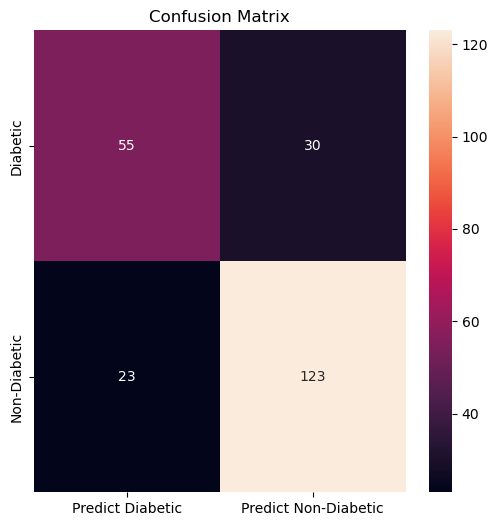

In [31]:
Md1 = GaussianNB()
model_name = "GaussianNB"
Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Md1, Param_grid={})
summary = summary._append({'Model': model_name, 'Training Accuracy': Mdl_train_sc, 'Test Accuracy Score': Score_Accuracy, 'Test Recall Score': Score_Recall, 'Test Precision Score': Score_Precision, 'AUC': roc_auc}, ignore_index=True)

Best fit parameter is: {'metric': 'manhattan', 'n_neighbors': 7}
Training score is: 0.7110115303983229
Test Mean score is: 0.7748917748917749
Model Accuracy Score: 77.49%
Model Recall Score: 58.82%
Model Precision Score: 74.63%
Area under the ROC curve : 0.8361


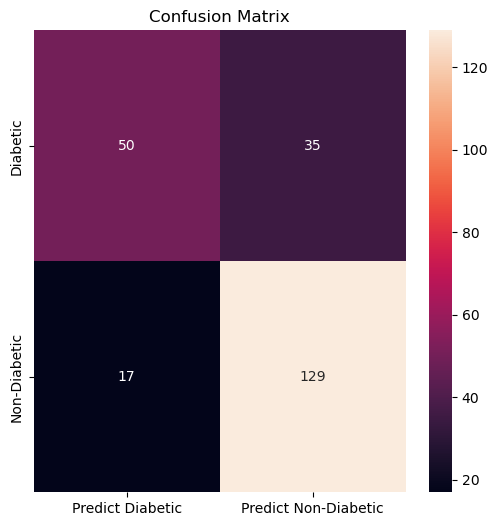

In [32]:
Mdl=KNeighborsClassifier()
model_name = "k-Nearest Neighbours"
Param_grid_kNeigh = {'n_neighbors': list(np.arange(3,8)), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test (Mdl, Param_grid_kNeigh)
summary= summary._append({'Model' : model_name, 'Training Accuracy': Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,'Test Recall Score' : Score_Recall, 'Test Precision Score': Score_Precision, 'AUC': roc_auc},
ignore_index=True)


Best fit parameter is: {'C': 0.1, 'kernel': 'linear'}
Training score is: 0.7384078732820871
Test Mean score is: 0.7792207792207793
Model Accuracy Score: 77.92%
Model Recall Score: 57.65%
Model Precision Score: 76.56%
Area under the ROC curve : 0.876


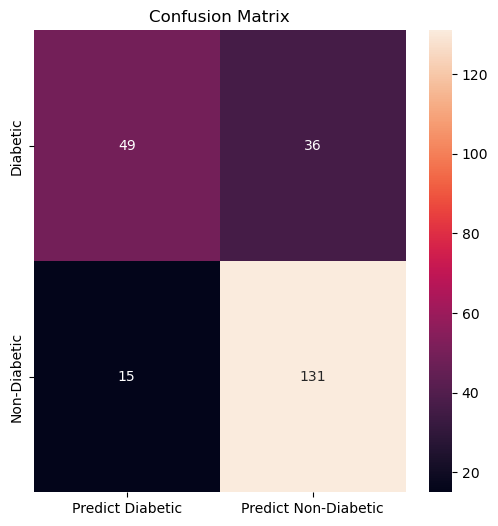

In [33]:
Md1 = SVC (probability=True)
model_name = "Support Vector Machine"
Param_grid_SVC = {'C': np.linspace (0.1,1.1,10), 'kernel': ['linear', 'poly', 'rbf',]}
Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Md1, Param_grid_SVC)
summary = summary._append({ 'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,'Test Recall Score' : Score_Recall, 'Test Precision Score': Score_Precision, 'AUC': roc_auc}, ignore_index=True)

Best fit parameter is: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.009}
Training score is: 0.7257273468436992
Test Mean score is: 0.7662337662337663
Model Accuracy Score: 76.62%
Model Recall Score: 63.53%
Model Precision Score: 70.13%
Area under the ROC curve : 0.8444


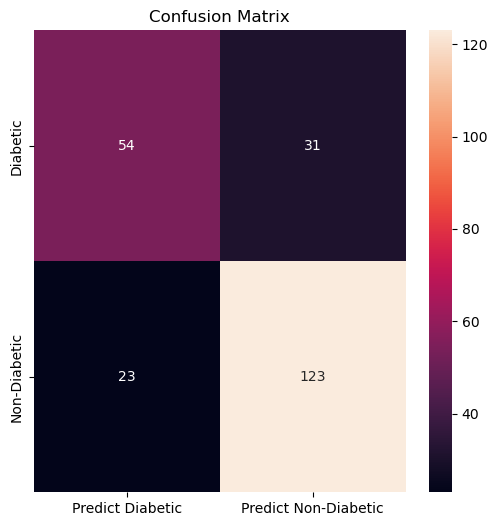

In [34]:
Mdl = DecisionTreeClassifier(random_state=1)
model_name = "DecisionTreeClassifier"
Param_grid_dt = {'criterion': ['gini', 'entropy'],'max_depth': [3, 4, 5, 6, 7, 8],'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]
}
Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl, Param_grid_dt)
summary = summary._append({'Model': model_name,'Training Accuracy': Mdl_train_sc,'Test Accuracy Score': Score_Accuracy,
'Test Recall Score': Score_Recall,'Test Precision Score': Score_Precision,'AUC': roc_auc}, ignore_index=True)


Best fit parameter is: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.009}
Training score is: 0.7257273468436992
Test Mean score is: 0.7662337662337663
Model Accuracy Score: 76.62%
Model Recall Score: 63.53%
Model Precision Score: 70.13%
Area under the ROC curve : 0.8444


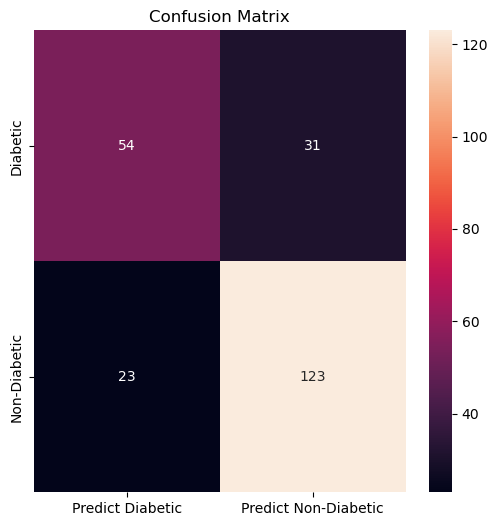

In [36]:
Md1 = RandomForestClassifier (random_state=1,n_estimators=100)
model_name = "RandomForestClassifier"
Param_grid_rf = {'criterion':['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}
Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_rf)
summary = summary._append({ 'Model' : model_name, 'Training Accuracy': Mdl_train_sc, 'Test Accuracy Score': Score_Accuracy, 'Test Recall Score' : Score_Recall, 'Test Precision Score': Score_Precision, 'AUC': roc_auc},ignore_index=True)

In [37]:
summary

,Model,Training Accuracy,Test Accuracy Score,Test Recall Score,Test Precision Score,AUC
0,LogisticRegression,76.73%,78.35%,58.82%,76.92%,0.8764
1,GaussianNB,73.74%,77.06%,64.71%,70.51%,0.8516
2,k-Nearest Neighbours,71.10%,77.49%,58.82%,74.63%,0.8361
3,Support Vector Machine,73.84%,77.92%,57.65%,76.56%,0.8760
4,DecisionTreeClassifier,72.57%,76.62%,63.53%,70.13%,0.8444
5,RandomForestClassifier,72.57%,76.62%,63.53%,70.13%,0.8444
